In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_col = ["sentence","title","address","phone","datetime","table","client_no","cashier"]
y_col = ["title","address","phone","datetime","table","client_no","cashier"]


In [11]:
train_df = pd.read_csv('../text_classification/info_df.csv',   encoding='utf-8')
train_df.head()

,sentence,title,address,phone,datetime,table,client_no,cashier,website
0,DT: 0903915144,0,0,1,0,0,0,0,0
1,"ĐC: 126 Lai Hùng Cường, Vĩnh Lọc B,",0,1,0,0,0,0,0,0
2,"Bình Chánh, TpHCM",0,1,0,0,0,0,0,0
3,ĐT: 0934145879,0,0,1,0,0,0,0,0
4,Ngày: 25/03/2019 Số: 031900002,0,0,0,1,0,0,0,0


In [14]:
def count_pandas(df,row):
    count = 0
    for index,data in df.iterrows():
        if data[row] > 0:
            count+= 1
    return count
#     new_pandas = df.query(row+">0")
#     return new_pandas.shape[0]

# count_pandas(train_df,"info")

In [300]:
# Delete same data
# delete_data = []
# for index, row in train_df.iterrows():
#     sentence = row['sentence']
#     for i,r in train_df.iterrows():
#         if i!= index:
#             if r['sentence'] == sentence:
#                 delete_data.append(i)
#                 print("=====")
#                 print(row['sentence'])
#                 print(r['sentence'])

In [301]:
# # delete data
# delete_data = list(set(delete_data))

# org_train_df = train_df
# org_delete_data = delete_data
# delete_data = []
# for i in org_delete_data:
#     delete_data.append(int(i))
# # for index in delete_data:
# #     train_df.drop[train_df.loc(int(index))]
# # print(len(delete_data))
# # print(delete_data)
# train_df = train_df.drop(delete_data)

In [302]:
# train_df.to_csv("31-07-vigroupped.csv", index = False,  encoding='utf-8')

In [303]:
# df.query("brand_name>0")

[21, 35, 30, 35, 9, 5, 19]


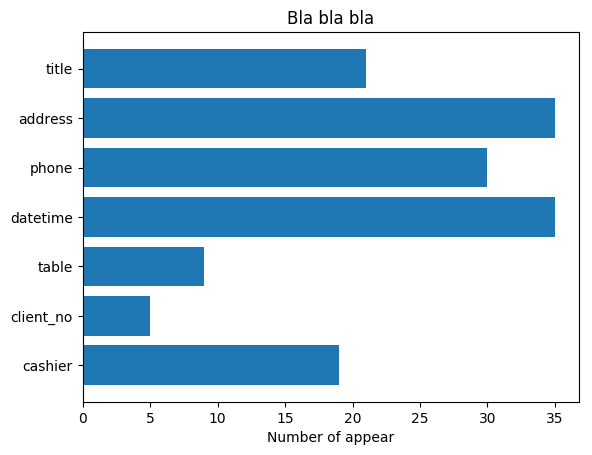

In [15]:
# Explore data
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data

y_pos = np.arange(len(y_col))
performance = []

for col in y_col:
    performance.append(count_pandas(train_df,col))

print(performance)
error = np.random.rand(len(y_col))

ax.barh(y_col, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_col)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of appear')
ax.set_title('Bla bla bla')

plt.show()

In [16]:
import numpy as np
import os
import pickle
from keras.optimizers import SGD, Adam, Nadam, RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras.models import Sequential,Model,load_model
from keras.layers import Embedding,Conv1D,MaxPooling1D
from keras.layers.core import Dense, Activation,Dropout ,Flatten
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence,one_hot,Tokenizer
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint,TensorBoard, ReduceLROnPlateau,EarlyStopping
from keras.applications import Xception
from keras import regularizers
from keras import backend as K
import keras
import numpy as np
import pandas as pd
import cv2
import os
import glob
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [17]:
seed = 120
np.random.seed(seed)
train_df = shuffle(train_df)
train_df.head()

,sentence,title,address,phone,datetime,table,client_no,cashier,website
30,DT: 09033d4,0,0,1,0,0,0,0,0
13,"SOH.DON;, 00001-20102014601",0,0,0,0,0,0,1,0
93,Thái Học - TX.Nghĩa Lộ -,0,1,0,0,0,0,0,0
154,0994 0s7 2m +,0,0,1,0,0,0,0,0
92,"44 Dao Duy Tu, Hoan Kiem, Ha Noi Viet nam",0,1,0,0,0,0,0,0


In [18]:
X_train = train_df["sentence"].fillna("fillna").values
Y_train = train_df[y_col].values

In [19]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)

Shape of X_train: (173,)
Shape of Y_train: (173, 7)


In [20]:
Tokenizer = Tokenizer()
print(X_train[0])
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels
texts = X_train
print(texts[1])

DT: 09033d4
(Input->Sentence) Length of X_train: (173,)
(output->Labels) Length of Y_train: (173, 7)
SOH.DON;, 00001-20102014601


In [21]:
Tokenizer.fit_on_texts(texts) 
Tokenizer_vocab_size = len(Tokenizer.word_index) + 1
print("Tokenizer vocabulary size:",Tokenizer_vocab_size)
len(max(X_train,key=len))


Tokenizer vocabulary size: 503


43

In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (138,)
(output->Labels) Length of Y_train: (138, 7)


In [23]:
X_train_encoded_words = Tokenizer.texts_to_sequences(X_train)
X_val_encoded_words = Tokenizer.texts_to_sequences(X_val)

In [24]:
print(X_train[2])
print(X_train_encoded_words[2])
print(Tokenizer.word_index)

Mocha ‹Jc<Eitnidl TU: eo  23LL5Í
[164, 165, 166, 43, 167, 168]
{'giờ': 1, 'ngày': 2, '17': 3, '12': 4, 'hoa': 5, '1': 6, 'số': 7, '01': 8, 'hà': 9, 'dt': 10, 'don': 11, '2017': 12, '13': 13, 'ban': 14, 'thu': 15, '19': 16, '05': 17, 'administrator': 18, '36': 19, '2018': 20, 'nam': 21, '10': 22, '15': 23, 'thanh': 24, '25': 25, '11': 26, 'vào': 27, 'khách': 28, '28': 29, 'nguyễn': 30, '23': 31, '04': 32, '24': 33, '2': 34, 'ra': 35, '03': 36, 'cashier': 37, 'tp': 38, '18': 39, 'toán': 40, 'hai': 41, 'a': 42, 'tu': 43, 'ha': 44, '26': 45, 'hàng': 46, 'acc': 47, 'bình': 48, 'tphcm': 49, 'bill': 50, '20': 51, '07': 52, 'lúc': 53, '38': 54, 'ngân': 55, 'dương': 56, 'phiếu': 57, '2014': 58, '8': 59, '49': 60, 'tt': 61, 'hotline': 62, '—': 63, 'hang': 64, '02': 65, 'đt': 66, '0': 67, '5': 68, 'đc': 69, 'b': 70, '66': 71, '44': 72, 'dao': 73, 'duy': 74, 'hoan': 75, 'kiem': 76, 'noi': 77, 'johor': 78, '30': 79, 'admin': 80, '151104': 81, 'pm': 82, 'bàn': 83, 'ngan': 84, 'in': 85, '1n': 86, 'đơ

In [25]:
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labelsprint("(Input->Sentence)

(output->Labels) Length of Y_train: (138, 7)


In [26]:
maxWordCount= 450
maxDictionary_size=Tokenizer_vocab_size
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen=maxWordCount)
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen=maxWordCount)

In [27]:
print("(Input->Sentence) Length of X_train:",X_train_encoded_padded_words.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (138, 450)
(output->Labels) Length of Y_train: (138, 7)


In [28]:
print(Y_train.shape)
print(Y_val.shape)

(138, 7)
(35, 7)


In [33]:
# Model

model = Sequential()

model.add(Embedding(maxDictionary_size, 32, input_length=maxWordCount)) #to change words to ints
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
 #hidden layers
model.add(LSTM(10))
# model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(1200, activation='relu',W_constraint=maxnorm(1)))
# model.add(Dropout(0.6))
model.add(Dense(500, activation='relu',W_constraint=maxnorm(1)))

# model.add(Dropout(0.5))
 #output layer
model.add(Dense(7, activation='softmax'))

# Compile model
# adam=Adam(lr=learning_rate, beta_1=0.7, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

model.summary()

W0807 21:31:23.930482 4414543296 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 450, 32)           16096     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1200)              13200     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               600500    
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 3507      
Total params: 635,023
Trainable params: 635,023
Non-trainable params: 0
_________________________________________________________________


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1200, activation="relu", kernel_constraint=<keras.con...)`
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_constraint=<keras.con...)`


In [34]:
learning_rate=0.0001
epochs = 25
batch_size = 32 #32
sgd = SGD(lr=learning_rate, nesterov=True, momentum=0.7, decay=1e-4)
Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])

In [35]:
print(X_train_encoded_padded_words.shape)
print(Y_train.shape)

print(X_val_encoded_padded_words.shape)
print(Y_val.shape)

(138, 450)
(138, 7)
(35, 450)
(35, 7)


In [36]:
history  = model.fit(X_train_encoded_padded_words,Y_train, epochs = epochs, batch_size=batch_size, verbose=1,
validation_data=(X_val_encoded_padded_words, Y_val))

W0807 21:31:28.876568 4414543296 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 138 samples, validate on 35 samples
Epoch 1/25
138/138 [==============================] - 2s 17ms/step - loss: 1.7078 - acc: 0.1159 - val_loss: 1.7295 - val_acc: 0.2857
Epoch 2/25
138/138 [==============================] - 1s 8ms/step - loss: 1.6375 - acc: 0.2609 - val_loss: 1.7003 - val_acc: 0.1429
Epoch 3/25
138/138 [==============================] - 1s 8ms/step - loss: 1.5691 - acc: 0.2681 - val_loss: 1.5942 - val_acc: 0.1714
Epoch 4/25
138/138 [==============================] - 1s 9ms/step - loss: 1.4528 - acc: 0.3116 - val_loss: 1.4987 - val_acc: 0.3143
Epoch 5/25
138/138 [==============================] - 1s 8ms/step - loss: 1.3063 - acc: 0.4348 - val_loss: 1.3904 - val_acc: 0.4286
Epoch 6/25
138/138 [==============================] - 1s 10ms/step - loss: 1.0648 - acc: 0.5000 - val_loss: 1.2726 - val_acc: 0.4857
Epoch 7/25
138/138 [==============================] - 1s 9ms/step - loss: 0.9920 - acc: 0.5290 - val_loss: 1.2408 - val_acc: 0.4571
Epoch 8/25
138/138 [=========

In [37]:
score = model.evaluate(X_val_encoded_padded_words, Y_val, verbose=1)
print('Test accuracy:', score[1],'%')

35/35 [==============================] - 0s 2ms/step
Test accuracy: 0.5142857151372092 %


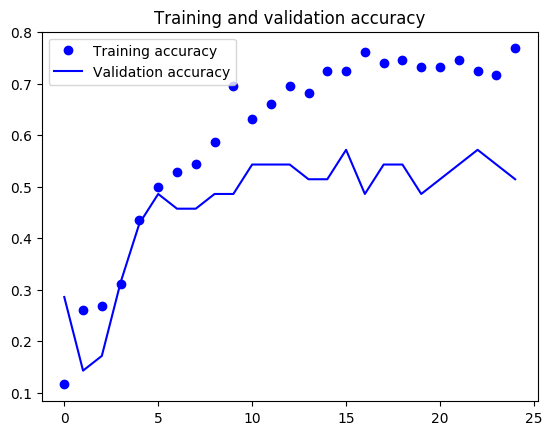

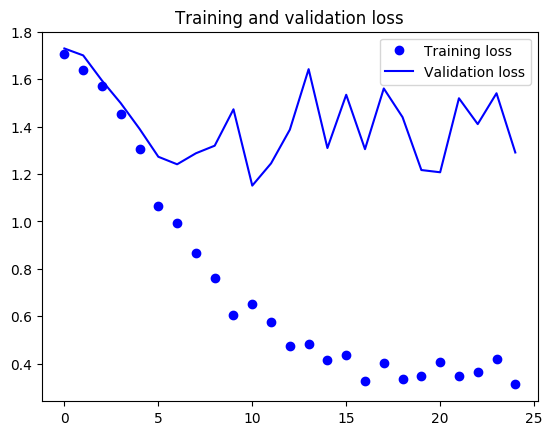

In [38]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
phrase = "3T: 0902018996"
tokens = Tokenizer.texts_to_sequences([phrase])
tokens = pad_sequences(tokens, maxlen=450)
prediction = model.predict(np.array(tokens))
i_raw,j_raw = np.where(prediction == prediction.max()) #calculates the index of the maximum element of the array across all axis
# i->rows, j->columns
i = int(i_raw)
j = int(j_raw)
print(prediction[0][j])
print(j_raw)
total_possible_outcomes = y_col
print("Result:",total_possible_outcomes[j])

0.9967608
[2]
Result: phone


In [40]:
# serialize model to JSON
model_json = model.to_json()
with open("info_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("info_model.h5")
print("Saved model to disk")

with open('info_tokenizer.pickle', 'wb') as handle:
    pickle.dump(Tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

Saved model to disk
